In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as torch_optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from datetime import datetime

In [ ]:
df = pd.read_csv('df_final_telegram.csv')
df.head()

,Unnamed: 0,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,0,1,137,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
1,1,2,134,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
2,2,3,127,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
3,3,4,125,25,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
4,4,5,124,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0


In [ ]:
dataset=df.drop(columns=['Unnamed: 0', 'index'] , axis=1)
dataset.dropna(inplace=True)

In [ ]:
df_x = dataset[['Points', 'Status', 'суммабалловсертификата', 'преимущественноеправо', 'profile subject_1', 'profile subject_2']]
df_y = dataset[['specialization_name']]

In [ ]:
# df_y = pd.get_dummies(
#     data=df_y,
#     columns=["specialization_name"],
#     prefix=["specialization_name"])
df_x = pd.get_dummies(
    data=df_x,
    columns=["преимущественноеправо"],
    prefix=["преимущественноеправо"])
df_x = pd.get_dummies(
    data=df_x,
    columns=["profile subject_1"],
    prefix=["profile subject_1"])
df_x = pd.get_dummies(
    data=df_x,
    columns=["profile subject_2"],
    prefix=["profile subject_2"])

In [ ]:
# df_x['Status'].value_counts()
df_y.dtypes
# df_x.dtypes

specialization_name    object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_x['Status'] = labelencoder.fit_transform(df_x['Status'])
df_y['specialization_name'] = labelencoder.fit_transform(df_y['specialization_name'])
# df_y['Univer_code'] = labelencoder.fit_transform(df_y['Univer_code'])
df_x = df_x.select_dtypes(exclude = 'object')
df_y = df_y.select_dtypes(exclude = 'object')
# df_y = df_y[['specialization_name']]
df_x = df_x.astype(float)
df_y = df_y.astype(float)

<ipython-input-74-8477de27cfcf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y['specialization_name'] = labelencoder.fit_transform(df_y['specialization_name'])


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.10, random_state=0)
X_train.head()

,Points,Status,суммабалловсертификата,преимущественноеправо_-,преимущественноеправо_аб,преимущественноеправо_мнс,преимущественноеправо_непс,преимущественноеправо_отличник,profile subject_1_Биология,profile subject_1_Всемирная история,...,profile subject_2_Биология,profile subject_2_Всемирная история,profile subject_2_География,profile subject_2_Иностранный язык,profile subject_2_Казахская /Русская литература,profile subject_2_Математика,profile subject_2_Основы права,profile subject_2_Творческий экзамен,profile subject_2_Физика,profile subject_2_Химия
14691,78.0,0.0,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26805,70.0,1.0,69.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26130,68.0,0.0,50.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15465,79.0,0.0,58.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20593,75.0,0.0,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# X_train.dtypes.value_counts()
# X_train.select_dtypes(include=['int64']).nunique()
# X_train = X_train[X_train.Points != 'БАЛНУРА']
# X_train[X_train.eq('АГА').any(1)]
# X_train = X_train.astype(int)
# X_train = X_train.select_dtypes(include = 'int64')
df_y

,specialization_name
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
27663,51.0
27664,51.0
27665,51.0
27666,51.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test    = scaler.transform(X_test)

In [ ]:
import keras

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="relu", input_shape=(X_train.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="relu"),
        keras.layers.Dropout(0.3),
     
        keras.layers.Dense(units=9, activation="relu"),
        keras.layers.Dropout(0.3),
     
        keras.layers.Dense(units=9, activation="relu"),
        keras.layers.Dropout(0.3),
     
        keras.layers.Dense(units=9, activation="relu"),
        keras.layers.Dropout(0.3),
     
        keras.layers.Dense(units=9, activation="relu"),
        
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 9)                 252       
                                                                 
 dropout_3 (Dropout)         (None, 9)                 0         
                                                                 
 dense_10 (Dense)            (None, 9)                 90        
                                                                 
 dropout_4 (Dropout)         (None, 9)                 0         
                                                                 
 dense_11 (Dense)            (None, 9)                 90        
                                                                 
 dropout_5 (Dropout)         (None, 9)                 0         
                                                                 
 dense_12 (Dense)            (None, 9)                

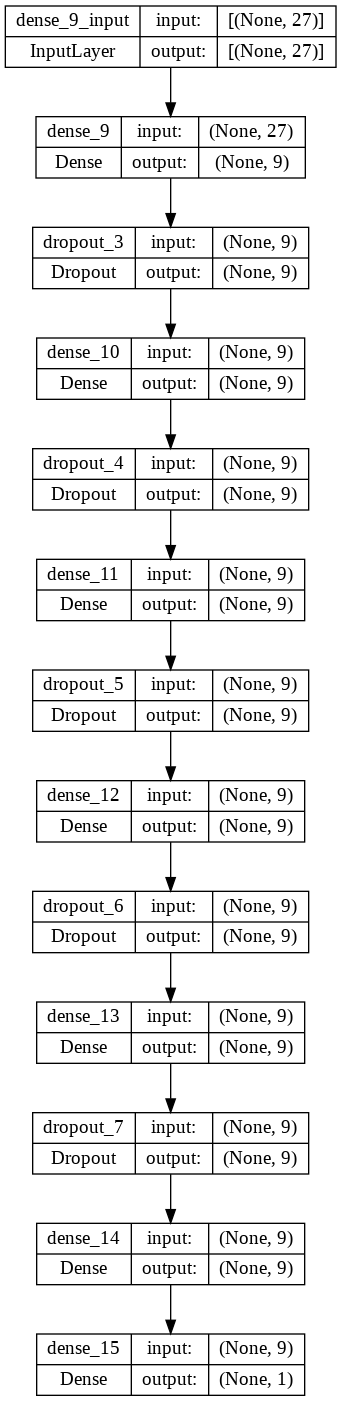

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
              loss="binary_crossentropy", 
              metrics=keras.metrics.AUC()
             )

In [ ]:
history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_val, y_val),
          verbose=0)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.0002, # minimium amount of change to count as an improvement
    patience  = 20,     # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
history = model.fit(X_train, y_train, 
          epochs=50, 
          batch_size=2000, 
          validation_data=(X_val, y_val),
          verbose=0,
          # add in our early stopping callback
          callbacks=[early_stopping]
        )

In [ ]:
# model.evaluate()

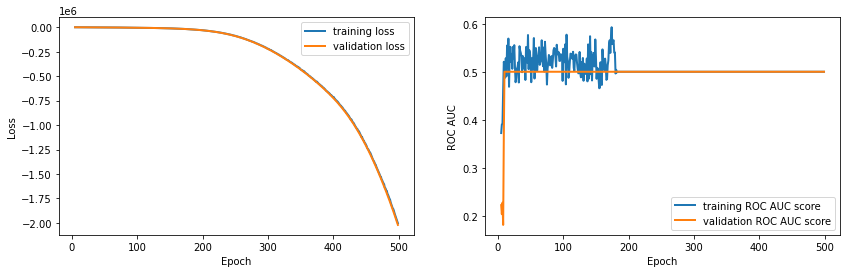

In [ ]:
import matplotlib.pyplot as plt
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_3"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_3"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
logs

,loss,auc_3,val_loss,val_auc_3
0,-9.139188e+03,0.5,-9.456396e+03,0.5
1,-9.680923e+03,0.5,-1.001203e+04,0.5
2,-1.025379e+04,0.5,-1.059835e+04,0.5
3,-1.083708e+04,0.5,-1.121822e+04,0.5
4,-1.145889e+04,0.5,-1.187164e+04,0.5
...,...,...,...,...
495,-2.066472e+07,0.5,-2.075959e+07,0.5
496,-2.077544e+07,0.5,-2.086167e+07,0.5
497,-2.088497e+07,0.5,-2.096444e+07,0.5
498,-2.099268e+07,0.5,-2.106737e+07,0.5


In [ ]:
import time

start_time = time.time()
y_pred = model.predict(X_val)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
model.predict(X_test[0][0])

In [ ]:
X_test[0]

In [ ]:
df['Univer_code'].dtype

In [ ]:
model.evaluate()

ValueError: ignored